# 01-02. 東京都の自宅療養者数・入院者数・その他人数の比較

下記で公開されている東京都のコロナウイルス感染症検査陽性者の状況についてのデータを利用し、可視化を試みる。

タイトル|Link|説明
-----|--------|--------|
東京都福祉保健局 新型コロナウイルス感染症検査陽性者の状況 |<a href="https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000089/resource/54996023-7255-45c5-b5b0-60458d874715">https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000089/resource/54996023-7255-45c5-b5b0-60458d874715</a>| 東京都 新型コロナウイルス感染症検査陽性者の状況|

**データ出典：「新型コロナウイルス感染症検査陽性者の状況:東京都福祉保健局」**

参考までに、データの配置は本ファイルと同じフォルダ内に、  
tokyo_dataset/yyyymmdd フォルダ  
を作成し、その中に  
130001_tokyo_covid19_details_testing_positive_cases.csv  
のようにCSVファイルが置かれていることを想定している。グラフ画像は同フォルダに出力される。  

In [1]:
# Google Colab Matplotlib 日本語フォント対応用
# Google Colab を利用する場合は、下記コメントアウトを解除してください。

'''
!pip install japanize_matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib 
import seaborn as sns
sns.set(font="IPAexGothic")
'''

'\n!pip install japanize_matplotlib\n\nimport matplotlib.pyplot as plt\nimport japanize_matplotlib \nimport seaborn as sns\nsns.set(font="IPAexGothic")\n'

In [2]:
'''Main'''
import numpy as np
import pandas as pd
import os
import datetime as dt

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
# matplotlib の設定を調整   
plt.rcParams['font.family'] = 'IPAexGothic'
#plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 16 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 16

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
#pd.options.display.float_format = '{:.2f}'.format

In [4]:
#date
current_path = os.getcwd()

############################################
## 下記を変更してください
getting_data_dir = 'tokyo_dataset'
getting_data_date = '20210918'
getting_data_pref = 'Tokyo'
############################################

fig01_filename = '01_Number_of_people_receiving_home_treatment_in_{}_{}.png'.format(getting_data_pref, getting_data_date)
fig02_filename = '02_Number_of_positives_in_{}_{}.png'.format(getting_data_pref, getting_data_date)
fig03_filename = '03_Number_of_people_hospitalized_in_{}_{}.png'.format(getting_data_pref, getting_data_date)
fig04_filename = '04_Status_of_infected_persons_in_{}_{}.png'.format(getting_data_pref, getting_data_date)
fig05_filename = '05_Status_of_infected_persons_in_{}_{}.png'.format(getting_data_pref, getting_data_date)

fig01_title = 'Number of people receiving home treatment in {} : {}'.format(getting_data_pref, getting_data_date)
fig02_title = 'Number of positives in {} : {}'.format(getting_data_pref, getting_data_date)
fig03_title = 'Number of_people hospitalized in {} : {}'.format(getting_data_pref, getting_data_date)
fig04_title = 'Status of infected persons in {} : {}'.format(getting_data_pref, getting_data_date)
fig05_title = 'Status of infected persons in {} : {}'.format(getting_data_pref, getting_data_date)

fig01_filePath = current_path + os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), fig01_filename])
fig02_filePath = current_path + os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), fig02_filename])
fig03_filePath = current_path + os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), fig03_filename])
fig04_filePath = current_path + os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), fig04_filename])
fig05_filePath = current_path + os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), fig05_filename])



In [5]:
# Acquire Data
csv_01_file = os.path.sep.join(['/{}'.format(getting_data_dir), '{}'.format(getting_data_date), '130001_tokyo_covid19_details_testing_positive_cases.csv'])
data = pd.read_csv(current_path + csv_01_file)

In [6]:
data

,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,陽性者数（累計）,入院中,軽症・中等症,重症,宿泊療養,自宅療養,調整中,死亡,退院
0,130001,東京都,NaN,2020-02-28,37,21,16,5,NaN,NaN,NaN,1,15
1,130001,東京都,NaN,2020-02-29,37,21,16,5,NaN,NaN,NaN,1,15
2,130001,東京都,NaN,2020-03-01,39,23,18,5,NaN,NaN,NaN,1,15
3,130001,東京都,NaN,2020-03-02,39,23,18,5,NaN,NaN,NaN,1,15
4,130001,東京都,NaN,2020-03-03,40,22,17,5,NaN,NaN,NaN,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,130001,東京都,NaN,2021-09-14,367898,3335,3127,208,1374.0,6800.0,1650.0,2692,352047
565,130001,東京都,NaN,2021-09-15,368950,3097,2899,198,1381.0,5971.0,1755.0,2712,354034
566,130001,東京都,NaN,2021-09-16,369781,2879,2697,182,1307.0,6026.0,1445.0,2736,355388
567,130001,東京都,NaN,2021-09-17,370563,2684,2505,179,1272.0,5625.0,1333.0,2761,356888


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   全国地方公共団体コード  569 non-null    int64  
 1   都道府県名        569 non-null    object 
 2   市区町村名        0 non-null      float64
 3   公表_年月日       569 non-null    object 
 4   陽性者数（累計）     569 non-null    int64  
 5   入院中          569 non-null    int64  
 6   軽症・中等症       569 non-null    int64  
 7   重症           569 non-null    int64  
 8   宿泊療養         495 non-null    float64
 9   自宅療養         495 non-null    float64
 10  調整中          486 non-null    float64
 11  死亡           569 non-null    int64  
 12  退院           569 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 57.9+ KB


In [8]:
data_positive = data['陽性者数（累計）']

# Series を NumPy配列 に変換
narray_positive = data_positive.values
# 隣り合う要素同士の差分を計算
narray_positive_diff = np.diff(narray_positive)
# 先頭に 0 を追加
narray_positive_diff = np.append(0, narray_positive_diff)
#narray_positive_diff
# NumPy配列を Series に変換
data_positive_diff = pd.Series(narray_positive_diff)
data_positive_diff

0         0
1         0
2         2
3         0
4         1
       ... 
564    1004
565    1052
566     831
567     782
568     862
Length: 569, dtype: int64

In [9]:
#narray_positive.shape

In [10]:
#narray_positive_diff.shape

In [13]:
# 公表_年月日データをdatetime64変換
data['公表_年月日'] = pd.to_datetime(data['公表_年月日'])
# 日付カラムを data_date にいったん保持
data_date = data['公表_年月日']

# カラム削除
data_1 = data.drop(columns=['全国地方公共団体コード', '都道府県名', '市区町村名', '公表_年月日', '陽性者数（累計）', '退院'])
# 欠損値を0で埋める
data_1 = data_1.fillna(0)
# floatからintに変換
data_1 = data_1.astype('int')
# 日付カラムを data_1 の0列目に追加
data_1.insert(0, '公表_年月日', data_date)
# 陽性者数カラムを data_1 の1列目に追加
data_1.insert(1, '陽性者', data_positive_diff)
data_1

,公表_年月日,陽性者,入院中,軽症・中等症,重症,宿泊療養,自宅療養,調整中,死亡
0,2020-02-28,0,21,16,5,0,0,0,1
1,2020-02-29,0,21,16,5,0,0,0,1
2,2020-03-01,2,23,18,5,0,0,0,1
3,2020-03-02,0,23,18,5,0,0,0,1
4,2020-03-03,1,22,17,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...
564,2021-09-14,1004,3335,3127,208,1374,6800,1650,2692
565,2021-09-15,1052,3097,2899,198,1381,5971,1755,2712
566,2021-09-16,831,2879,2697,182,1307,6026,1445,2736
567,2021-09-17,782,2684,2505,179,1272,5625,1333,2761


In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   公表_年月日  569 non-null    datetime64[ns]
 1   陽性者     569 non-null    int64         
 2   入院中     569 non-null    int64         
 3   軽症・中等症  569 non-null    int64         
 4   重症      569 non-null    int64         
 5   宿泊療養    569 non-null    int64         
 6   自宅療養    569 non-null    int64         
 7   調整中     569 non-null    int64         
 8   死亡      569 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 40.1 KB


In [15]:
data_1.describe()

,陽性者,入院中,軽症・中等症,重症,宿泊療養,自宅療養,調整中,死亡
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,652.702988,1710.441125,1645.314587,65.126538,654.140598,2600.363796,1564.963093,1003.054482
std,1003.295428,1014.726174,960.582946,62.070650,596.509053,5276.517147,2783.651554,854.764263
min,0.000000,21.000000,16.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,136.000000,1057.000000,1025.000000,25.000000,156.000000,214.000000,250.000000,326.000000
50%,314.000000,1522.000000,1480.000000,46.000000,453.000000,601.000000,563.000000,523.000000
75%,676.000000,2358.000000,2288.000000,74.000000,1013.000000,1672.000000,1169.000000,1889.000000
max,5773.000000,4351.000000,4084.000000,297.000000,2197.000000,26409.000000,14726.000000,2781.000000


## 02-01-01. 東京都の自宅療養者数の変化

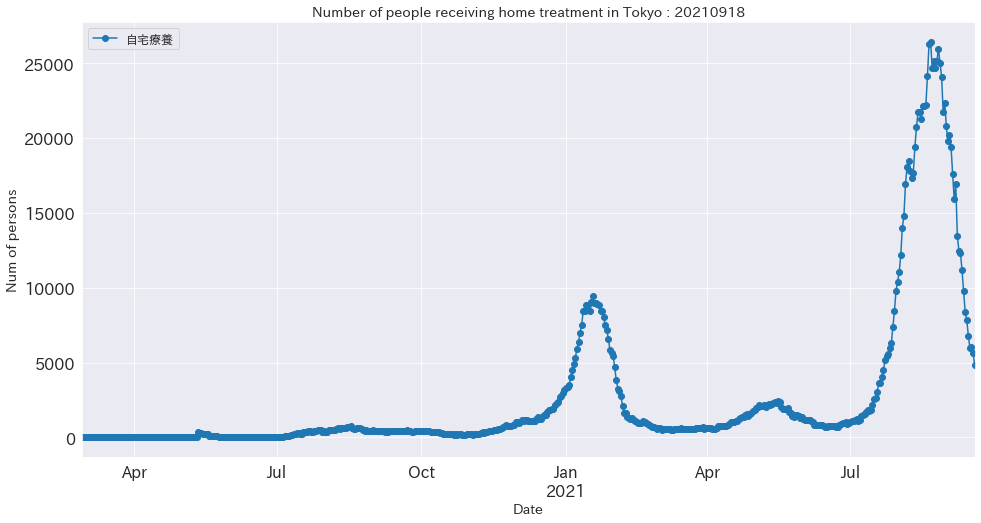

In [19]:
data_1.index = data_1['公表_年月日']
data_1.plot(x = "公表_年月日",  y='自宅療養', marker='o')
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [16, 8]
# plt.title('東京都の自宅療養者数', fontsize=14)
plt.title(fig01_title, fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Num of persons", fontsize=14)
plt.legend()
plt.savefig(fig01_filePath, dpi=200)
plt.show()

## 02-01-02. 東京都の陽性者数の変化

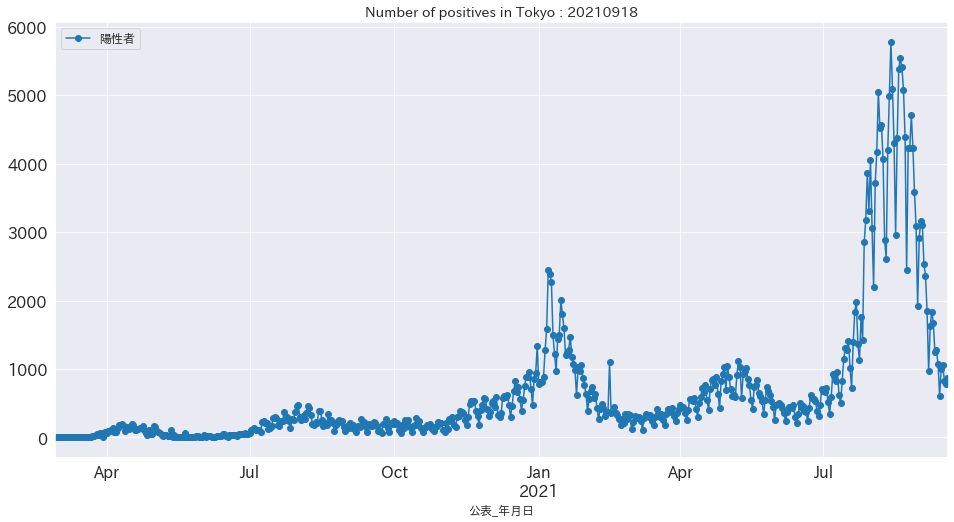

In [20]:
data_1.plot(x = "公表_年月日",  y='陽性者', marker='o')
#plt.title('東京都の陽性者数', fontsize=14)
plt.title(fig02_title, fontsize=14)
plt.savefig(fig02_filePath, dpi=200)
plt.show()

## 02-01-03. 東京都の入院者数の変化

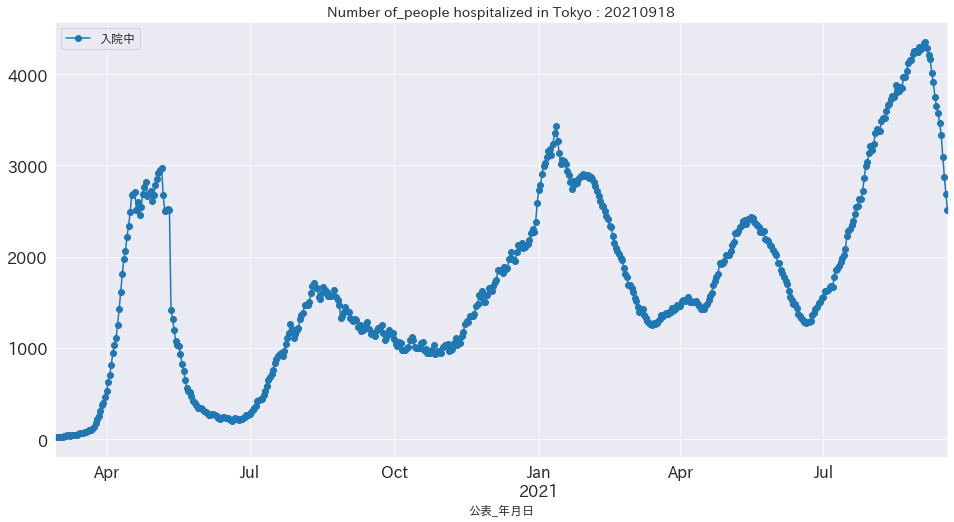

In [21]:
data_1.plot(x = "公表_年月日",  y='入院中', marker='o')
#plt.title('東京都の入院者数', fontsize=14)
plt.title(fig03_title, fontsize=14)
plt.savefig(fig03_filePath, dpi=200)
plt.show()

02-01-04. 東京都の感染者の状況（入院中・軽/中等症・自宅療養等の人数比較

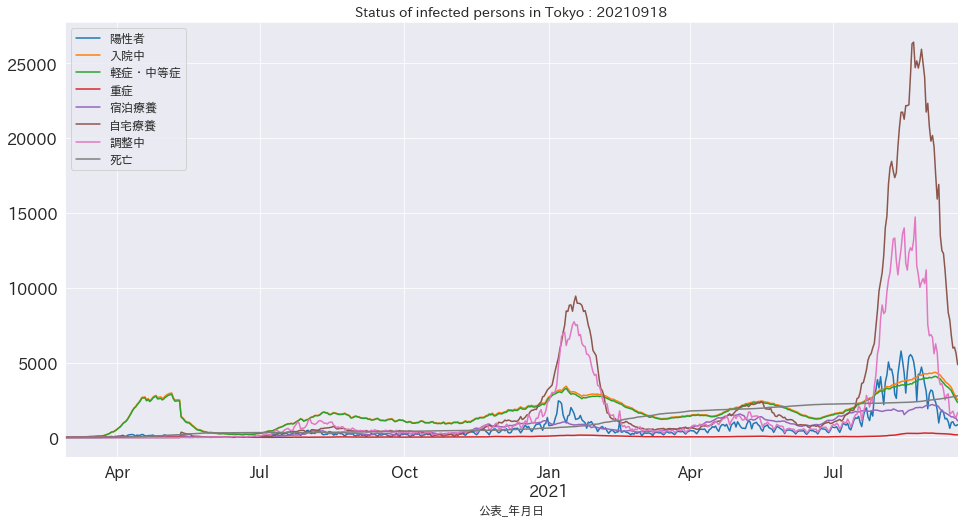

In [22]:
data_1.plot(x = "公表_年月日")
#plt.title('東京都の感染者の状況（入院中・軽/中等症・自宅療養等の人数比較）', fontsize=14)
plt.title(fig04_title, fontsize=14)
plt.savefig(fig04_filePath, dpi=200)
plt.show()


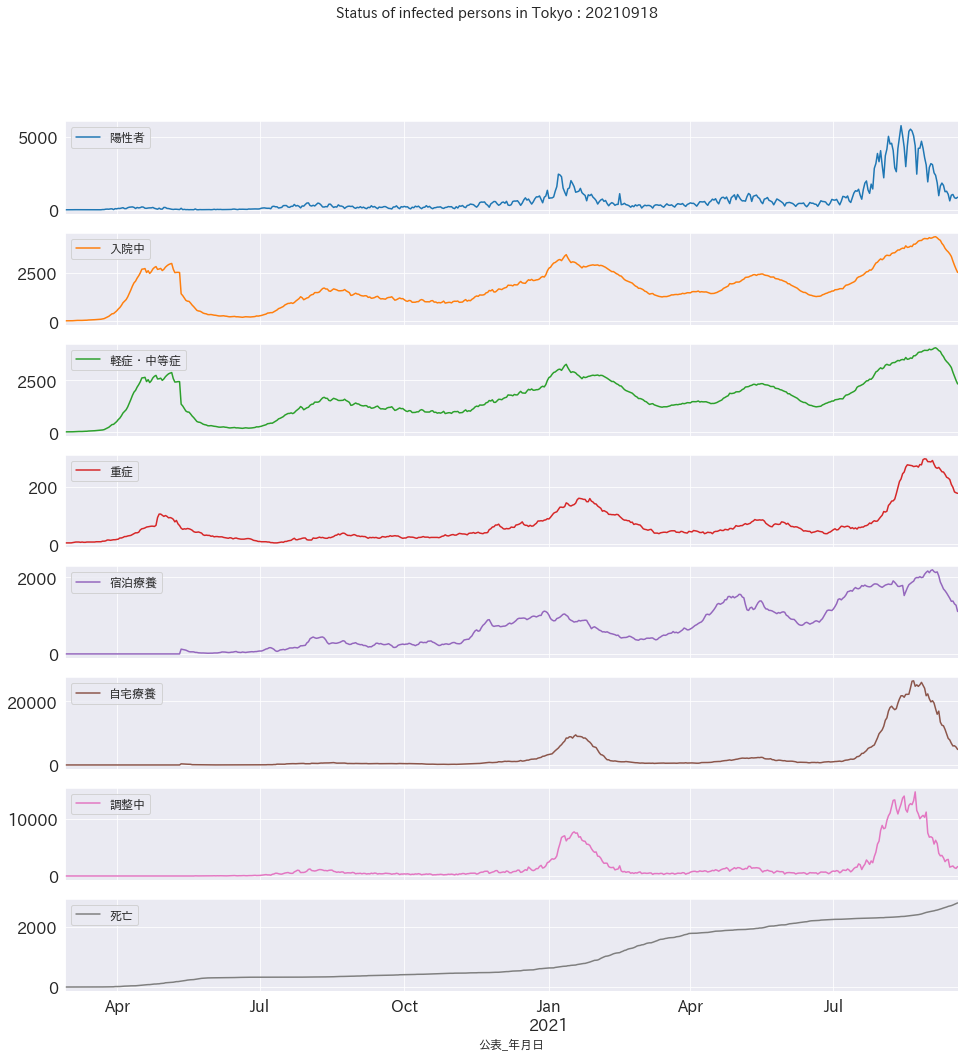

In [23]:
plt.rcParams["figure.figsize"] = [16, 16]
current_figsize = mpl.rcParams['figure.figsize']
#print(current_figsize)

data_1.plot(x = "公表_年月日", subplots = True, title = fig05_title)

plt.savefig(fig05_filePath, dpi=200)
plt.show()